# CODE TO PLOT THE SQUARE WAVE


$f(t) =
\begin{cases}
-1 & \text{for } -\frac{1}{2}T \leq t < 0, \\
+1 & \text{for } 0 \leq t < \frac{1}{2}T.
\end{cases}$

Here let  $\quad T = \pi$


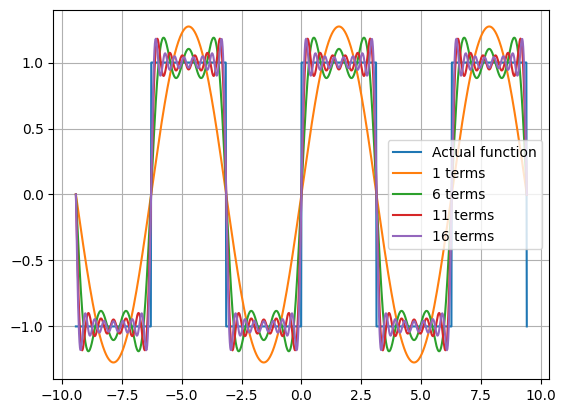

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def b(n):#coeffecients of sine
  return 2*(1-(-1)**n)/(np.pi*n)

def sqr_wave_approx(t, n):
  sum = 0
  for i in range(n+1):
    if i%2 != 0:
      sum += b(i)*np.sin(i*t)
  return sum

def sqr_wave_true(t):
  t = t % (2*np.pi)
  return np.where(t < np.pi, 1, -1)

t = np.linspace(-3*np.pi, 3*np.pi, 1000)
plt.plot(t, sqr_wave_true(t), label = 'Actual function')

for i in range(1, 20, 5):
  plt.plot(t, sqr_wave_approx(t, i), label = f'{i} terms')
plt.grid()
plt.legend()
plt.show()



# FINDING NUMBER OF TERMS REQUIRED FOR 1% ABSOLUTE ERROR

number of terms required for 1% error: 1895
approx value at t = 0.001: 0.9904401294400604
absolute error: 0.9559870559939565


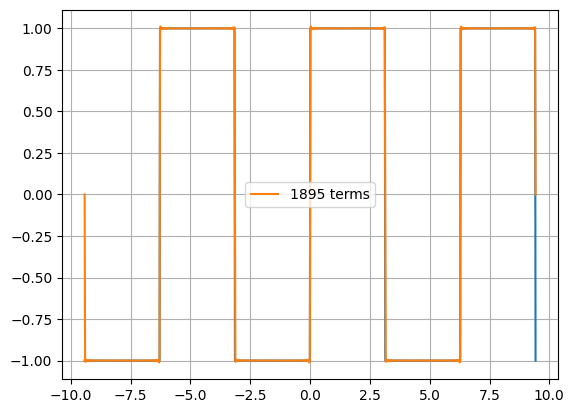

In [3]:
check = .001
true_val = sqr_wave_true(check)

def if_outside_tol(n, tol):
  # print(sqr_wave_approx(check, n))
  return abs((true_val - sqr_wave_approx(check, n))*100/true_val) > tol

n = 1
tol = 1

while if_outside_tol(n, tol):
  n += 1


print(f'number of terms required for 1% error: {n}')
print(f'approx value at t = {check}: {sqr_wave_approx(check, n)}')
print(f'absolute error: {(true_val - sqr_wave_approx(check, n))*100/true_val}')

plt.plot(t, sqr_wave_true(t))
plt.plot(t, sqr_wave_approx(t, n), label = f'{n} terms')
plt.grid()
plt.legend()
plt.show()


# NUMBER OF TERMS REQUIRED FOR CONVERGENCE AS A FUNCTION OF DISTANCE FROM DISCONTINUITY

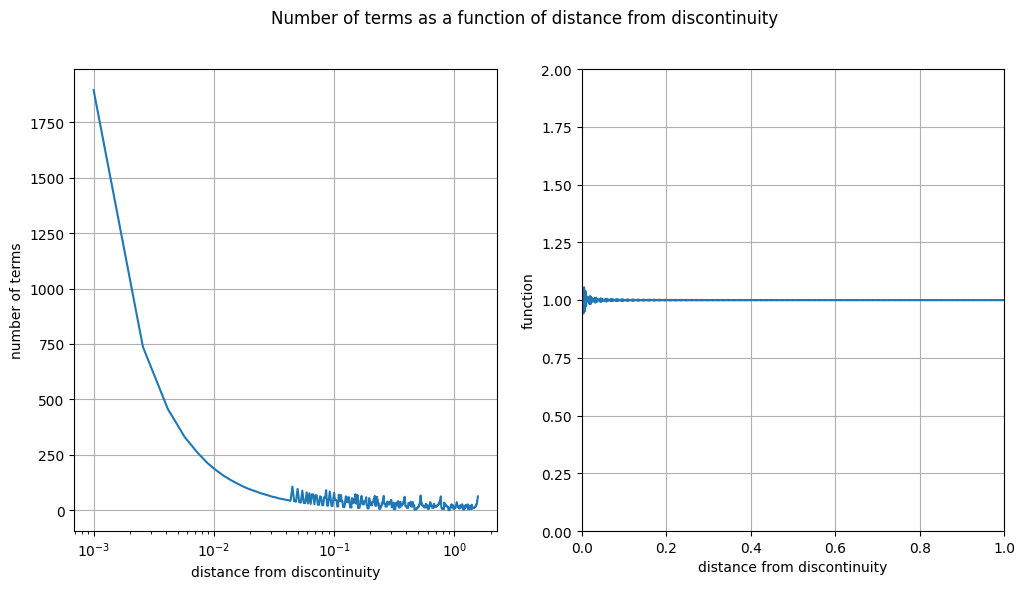

In [4]:
def if_converging(i, t, tol = 1):
    actual_val = sqr_wave_true(t)
    approx = sqr_wave_approx(t, i)
    error = abs((actual_val - approx)*100/actual_val)
    return error > tol

def terms_find(t):
    i = 0
    while if_converging(i, t):
        i += 1
    return i    

def make_plot(T):
    terms = []
    for t in T:
        terms.append(terms_find(t))
    return terms

T = np.linspace(0.001, np.pi/2, 1000)
terms = make_plot(T)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_xlabel('distance from discontinuity')
axs[0].set_ylabel('number of terms')
axs[0].grid()
axs[0].plot(T, terms)    
axs[0].set_xscale('log')
# axs[0].scatter(T, terms, s = 5, color = 'red')    

axs[1].axis([0, 1, 0, 2])
axs[1].grid()
axs[1].set_xlabel('distance from discontinuity')
axs[1].set_ylabel('function')
axs[1].plot( T, sqr_wave_approx(T, 1750))
plt.suptitle('Number of terms as a function of distance from discontinuity')
plt.show()       


# ERROR AS A FUCNTION OF NUMBRER OF TERMS 

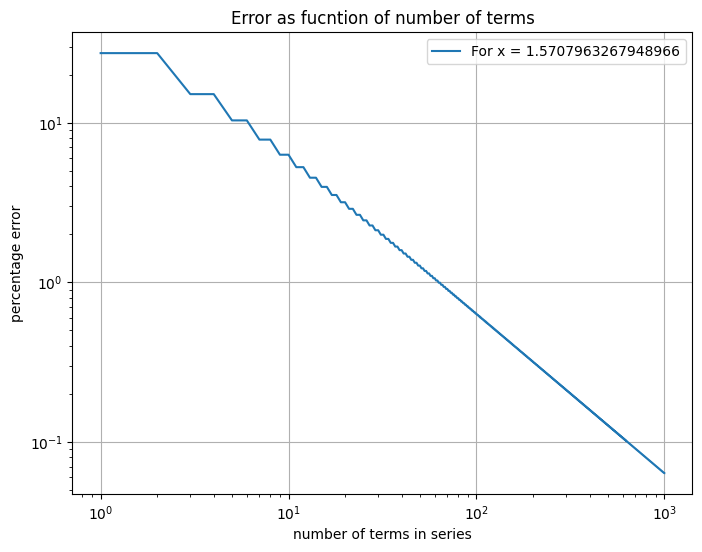

In [7]:
def error(i, t):
    actual_val = sqr_wave_true(t)
    approx = sqr_wave_approx(t, i)
    # print(actual_val,approx,'\n')
    error = abs((actual_val - approx)*100/actual_val)
    return error

def plot_error_n(numlist, t):
    error_n = []
    for i in numlist:
        error_n.append(error(i, t))
    return error_n

n = 1000
pos = np.pi/2
numlist = [i for i in range(1, n+1)]

plt.figure(figsize=(8, 6))
plt.grid(True)
plt.xlabel('number of terms in series')
plt.ylabel('percentage error')
plt.xscale('log')
plt.yscale('log')
plt.plot(numlist, plot_error_n(numlist, pos), label = f'For x = {pos}')   
plt.legend()
plt.title('Error as fucntion of number of terms')
plt.show() 


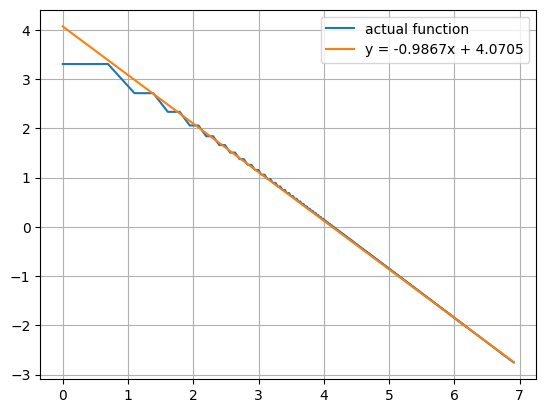

-0.986666918974567

In [15]:
x = np.log(numlist)
y = np.log(plot_error_n(numlist, pos))

coeffs = np.polyfit(x, y, 1)

plt.plot(x, y, label = 'actual function')
plt.plot(x, np.polyval(coeffs, x), label = f'y = {round(coeffs[0], 4)}x + {round(coeffs[1], 4)}')
plt.grid()
plt.legend()
plt.show()
coeffs[0]

# DFT

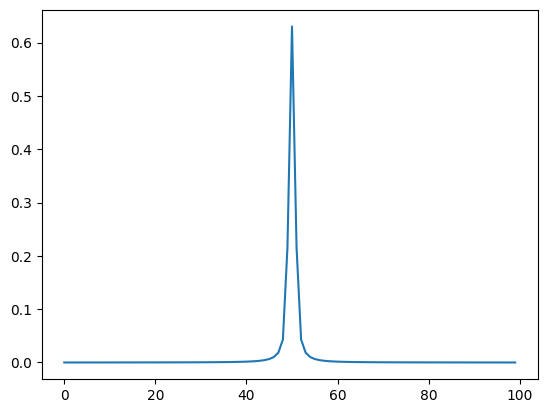

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#input
x = np.sin(50*np.linspace(0, 2*np.pi, 100))

#dft matrix
n = 100
w = np.exp(1j*2*np.pi/n)
F = np.array([[w**(j*k) for j in range(0, n)] for k in range(0, n)])

#output
x_vals = [i for i in range(0, n)]
f = np.dot(F, x)
# plt.plot(x_vals, x)
plt.plot(x_vals , abs(f)/n)
plt.show()


# FFT

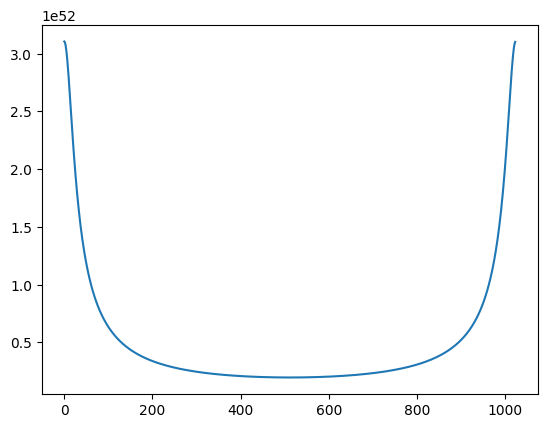

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#input
n1 = 1000
x = np.exp(20*np.linspace(0, 2*np.pi, n1))

if n1 & (n1-1) != 0:
    n = int(2**np.ceil(np.log2(n1)))
    x = np.pad(x, (0, n - n1), 'constant')
else:
    n = n1    

#fft 
def fft(n, x):
    if n == 2:
        F = np.array([[1, 1],[1, -1]])
        return np.dot(F, x)
    else:
        odd = fft(n//2, x[::2])
        even = fft(n//2, x[1::2])
        factors = np.exp(1j*2*np.pi*np.arange(n)/n)
        return np.concatenate([even + factors[:n//2]* odd, even + factors[n//2:]*odd])

#output
x_vals = [i for i in range(0, n)]
f = fft(n, x)
# plt.plot(x_vals, x)
plt.plot(x_vals , abs(f)/n)
plt.show()

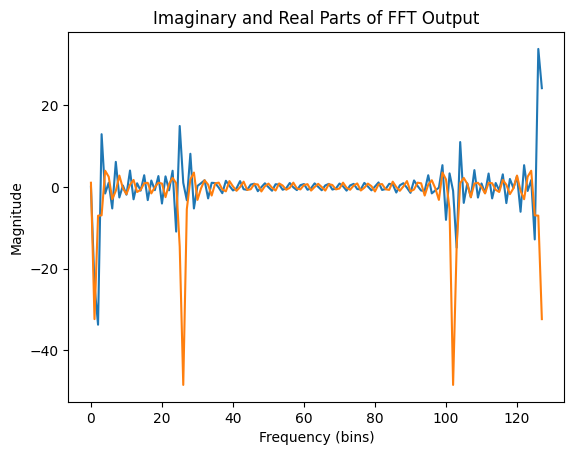

In [76]:
# Compute FFT
f = fft(n, x)

# Extract the imaginary part
imag_part = f.imag
real_part = f.real

# Plot the imaginary part
plt.plot(np.arange(n), imag_part)
plt.plot(np.arange(n), real_part)
plt.title("Imaginary and Real Parts of FFT Output")
plt.xlabel("Frequency (bins)")
plt.ylabel("Magnitude")
plt.show()
